# House Price Prediction

## Import tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv('Housing.csv')
df = pd.DataFrame(data)
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
df = df.drop(columns=['mainroad',
                      'guestroom',
                      'basement',
                      'hotwaterheating',
                      'airconditioning',
                      'prefarea',
                      'furnishingstatus'])
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2


In [4]:
x = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
x_train, x_test = x[:-5], x[-5:]

y = df[['price']].to_numpy()
y_train, y_test = y[:-5].ravel(), y[-5:].ravel()

print(x_train[:5])
print(y_train[:5])

[[7420    4    2    3    2]
 [8960    4    4    4    3]
 [9960    3    2    2    2]
 [7500    4    2    2    3]
 [7420    4    1    2    2]]
[13300000 12250000 12250000 12215000 11410000]


## Normalise data

In [5]:
# Z- score normalization
def z_norm(x_train):
    mu = np.mean(x_train, axis=0)
    sigma = np.std(x_train, axis=0)
    x_train = (x_train - mu) / sigma

    return x_train, mu, sigma

## Visualise data

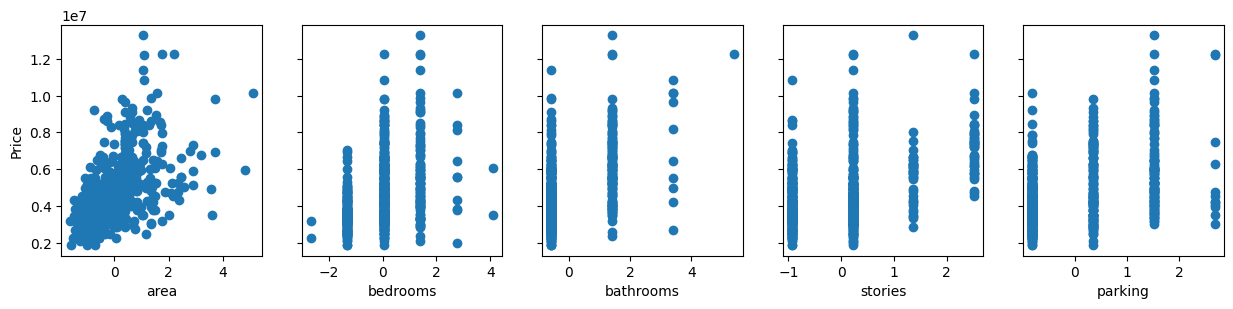

In [6]:
x_train, mu, sigma = z_norm(x_train)
cols = df.columns[1:]
fig, ax = plt.subplots(1, len(cols), figsize = (len(cols) * 3, 3), sharey=True)
for i in range(len(cols)):
    ax[i].scatter(x_train[:, i], y_train)
    ax[i].set_xlabel(cols[i])
ax[0].set_ylabel("Price")
plt.show()

## Find parameters

In [7]:
def compute_derivative(x, y, w, b):
    
    m,n = x_train.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [8]:
def final_parameters(x, y, w_in, b_in, alpha, iters):
    w = w_in[:]
    b = b_in

    for i in range(iters):
        dj_dw, dj_db = compute_derivative(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w, b 

In [21]:
w_init = np.zeros(x_train.shape[1])
w, b = final_parameters(x_train, y_train, w_init, 0.1, 0.0001, 100000)

for i in range(len(w)):
    w[i] = round(w[i], 2)
b = round(b, 2)
print(w)
print(b)

[706354.1  122609.09 567164.18 469268.15 326943.15]
4794282.98


In [12]:
def predict(x, y, w, b):
    for i in range(len(x)):
        print(f'predicted: {np.dot(x[i], w) + b}, actual: {y}')
    return

In [22]:
for i in range(len(mu)):
    mu[i] = round(mu[i], 2)
    sigma[i] = round(sigma[i], 2)
print(mu[0])
print(mu)
print(sigma)
print(sigma[0])

5169.01
[5.16901e+03 2.97000e+00 1.29000e+00 1.81000e+00 7.00000e-01]
[2.16904e+03 7.40000e-01 5.00000e-01 8.70000e-01 8.60000e-01]
2169.04


In [23]:
x = [[3850,3,1,2,0]]
x_temp = (x - mu) / sigma
print(x_temp)
print(np.dot(x_temp, w) + b)

[[-0.60810773  0.04054054 -0.58        0.2183908  -0.81395349]]
[3877126.33442996]
